In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
icfes= pd.read_csv('https://raw.githubusercontent.com/ngarciad/UPC/refs/heads/main/icfesreducido.csv')

##Transformación y conversión de variables

In [ ]:
#Libreria que permite trabajar con las fechas

from datetime import datetime

In [ ]:
#Función que calcula la edad de los usuarios a apartir de la fecha de nacimiento y la fecha de presentación de la prueba ICFES

def edad(cadena):
    nacimiento= datetime.strptime(cadena, '%d/%m/%Y') #Fecha de nacimiento del estudiante
    prueba= datetime.strptime('09/08/2020', '%d/%m/%Y') #Fecha de presentación del examen
    return prueba.year - nacimiento.year #Edad del estudiante

In [ ]:
icfes_copia= icfes
icfes2= icfes

In [ ]:
#Eliminación de una serie

icfes2= icfes.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
#Crea una serie o coulmna nueva

icfes2['ESTU_EDAD']= icfes['ESTU_FECHANACIMIENTO'].apply(lambda x: edad(x))

In [ ]:
# Genera la frecuencia de una serie  o columna
icfes2['ESTU_EDAD'].value_counts(normalize = False)

In [ ]:
# Crear una regla para filtrar los datos
# Parámetros

limite_inferior = 14
limite_superior = 80

icfes3= icfes2[(icfes2['ESTU_EDAD'] >= limite_inferior) & (icfes2['ESTU_EDAD'] <= limite_superior)]

In [ ]:
icfes3['ESTU_EDAD'].value_counts(normalize = False)

In [ ]:
# Revisar la cantidad de data perdida

icfes2.size - icfes3.size

945

In [ ]:
registros_eliminados= len(icfes2) - len(icfes3)
porcentaje= round(registros_eliminados / len(icfes2)*100, 2)

print(f"Registros eliminados=  {registros_eliminados}")
print(f"Porcentaje de registros eliminados=  {porcentaje}")

Registros eliminados=  63
Porcentaje de registros eliminados=  0.06


In [ ]:
# Eliminar registros u observaciones específicas
usuarios_eliminar1= [0, 1, 4, 7]
icfes3.drop(usuarios_eliminar1).head(20)


In [ ]:
# Otra forma de eliminar registros

usuarios_eliminar2=[100972, 10973]
icfesa= icfes3[~ icfes3.index.isin(usuarios_eliminar2)]

##Inspección y corrección de valores faltantes

Para corregir los valores faltantes hay varias alternativas, a continuación también se mencionan las funciones de la librería pandas que se emplean en cada caso:

- Eliminar los registros con NAs - dropna()
- Reemplazar por un valor constante (la media, la mediana, la moda o un valor personalizado) - fillna()
- Reemplazar por el último valor no faltante - fillna() esta solución es especialmente útil para series de tiempo, o conjuntos de datos altamente correlacionados.
- Utilizar modelos predictivos para hacer la imputación de valores faltantes.

Ahora debemos hacer un conteo de los valores faltantes por cada variable. Tenga presente que existen varios tipos de valores nulos: None, NaN y NA. NA es la representación más utilizada.

In [ ]:
# Muestra los valores nulos que se tienen en el DataFrame
icfes3.isnull().sum()

,0
ESTU_GENERO,2
ESTU_FECHANACIMIENTO,0
ESTU_TIENEETNIA,608
ESTU_DEPTO_RESIDE,0
FAMI_ESTRATOVIVIENDA,3394
FAMI_EDUCACIONPADRE,2596
FAMI_EDUCACIONMADRE,2702
FAMI_TIENEINTERNET,2696
FAMI_TIENECOMPUTADOR,4041
COLE_NATURALEZA,0


In [ ]:
#Muestra el porcentaje de valores nulos que se tienen en el DataFrame

icfes3.isnull().sum(axis= 0).sort_values(ascending= False)*100 / len(icfes3)

,0
FAMI_TIENECOMPUTADOR,4.004519
FAMI_ESTRATOVIVIENDA,3.363360
FAMI_EDUCACIONMADRE,2.677607
FAMI_TIENEINTERNET,2.671661
FAMI_EDUCACIONPADRE,2.572564
ESTU_TIENEETNIA,0.602511
ESTU_GENERO,0.001982
ESTU_FECHANACIMIENTO,0.000000
ESTU_DEPTO_RESIDE,0.000000
COLE_NATURALEZA,0.000000


###Caso 1: Eliminar las columnas con nulos

In [ ]:
icfes3.loc[icfes3['ESTU_EDAD']> 70].index

Index([11817, 44137], dtype='int64')

<Axes: xlabel='ESTU_EDAD'>

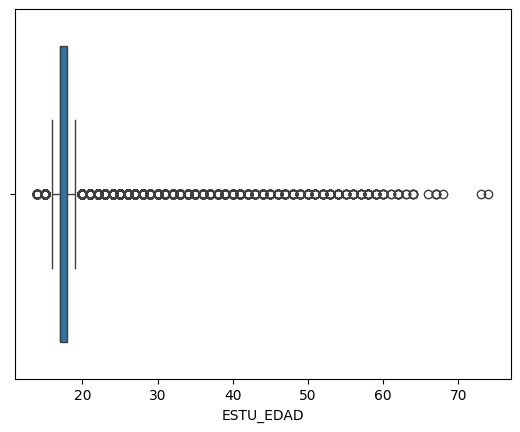

In [ ]:
sns.boxplot(data= icfes3, x='ESTU_EDAD')

In [ ]:
icfes4= icfes3.dropna(axis= 1)
print(icfes3.shape)
print(icfes4.shape)

(100911, 15)
(100911, 8)


In [ ]:
icfes3.size - icfes4.size

706377

###Caso 2. Eliminar filas de nulos

In [ ]:
icfes5= icfes3.dropna(axis = 0)
print(icfes3.shape)
print(icfes5.shape)

(100911, 15)
(94860, 15)


In [ ]:
icfes3.size - icfes5.size

90765

In [ ]:
icfes5.isnull().sum(axis= 1)

In [ ]:
icfes3.shape

(100911, 15)

In [ ]:
# Filtro por valores nulos mayores o iguanes 5

icfes6= icfes3[icfes3.isnull().sum(axis= 1) < 5 ]

In [ ]:
# Porcentaje de la data elininada

 (icfes3.size - icfes6.size)*100 / icfes3.size

2.3099562981240895

In [ ]:
#Porcentaje de la data que tiene valores nulos

icfes6.isnull().sum(axis= 1).sort_values(ascending= False)*100 / len(icfes6)

In [ ]:
icfes6.isnull().sum().sort_values(ascending= False)

,0
FAMI_TIENECOMPUTADOR,1710
FAMI_ESTRATOVIVIENDA,1063
FAMI_EDUCACIONMADRE,371
FAMI_TIENEINTERNET,365
ESTU_GENERO,0
ESTU_FECHANACIMIENTO,0
ESTU_TIENEETNIA,0
ESTU_DEPTO_RESIDE,0
FAMI_EDUCACIONPADRE,0
COLE_NATURALEZA,0


##Imputación por moda
Se realiza con las series (columnas) que son categóricas

In [ ]:
# Se genera la frecuencia de la serie (Columna)

icfes6['ESTU_TIENEETNIA'].value_counts(normalize = True)

,proportion
ESTU_TIENEETNIA,
No,0.937026
Si,0.062974


In [ ]:
icfes6['FAMI_EDUCACIONPADRE'].value_counts(normalize = True)

,proportion
FAMI_EDUCACIONPADRE,
Secundaria (Bachillerato) completa,0.246703
Primaria incompleta,0.188040
Secundaria (Bachillerato) incompleta,0.132288
Educación profesional completa,0.094522
Primaria completa,0.093203
Técnica o tecnológica completa,0.066180
No sabe,0.059982
Ninguno,0.042331
Educación profesional incompleta,0.020562


In [ ]:
# Imputatición de nulos por la moda de la serie 'ESTU_TIENEETNIA'

icfes6['ESTU_TIENEETNIA']= icfes6['ESTU_TIENEETNIA'].fillna(value= "No")

In [ ]:
icfes6['FAMI_EDUCACIONPADRE']= icfes6['FAMI_EDUCACIONPADRE'].fillna(value= "Secundaria (Bachillerato) completa")

#DataFrame London

In [ ]:
air= pd.read_csv('https://raw.githubusercontent.com/ngarciad/UPC/refs/heads/main/Londonair.csv')

In [ ]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Site                     35040 non-null  object 
 1   Species                  35040 non-null  object 
 2   ReadingDateTime          35040 non-null  object 
 3   Value                    32136 non-null  float64
 4   Units                    35040 non-null  object 
 5   Provisional or Ratified  35040 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1.6+ MB


In [ ]:
air.isnull().sum()

In [ ]:
air_median= air
air_median['Value'].median()

13.0

In [ ]:
air_median= air.fillna(13)
air_median.isnull().sum()

,0
Site,0
Species,0
ReadingDateTime,0
Value,0
Units,0
Provisional or Ratified,0


In [ ]:
air_median.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Site                     35040 non-null  object 
 1   Species                  35040 non-null  object 
 2   ReadingDateTime          35040 non-null  object 
 3   Value                    35040 non-null  float64
 4   Units                    35040 non-null  object 
 5   Provisional or Ratified  35040 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1.6+ MB


In [ ]:
# Otro metodo para imputar valores nulos

air.fillna(method= 'ffill', inplace= True)

<ipython-input-86-8854fd3a4cf3>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  air.fillna(method= 'ffill', inplace= True)


In [ ]:
air.isnull().sum()

,0
Site,0
Species,0
ReadingDateTime,0
Value,0
Units,0
Provisional or Ratified,0


<Axes: xlabel='ESTU_EDAD'>

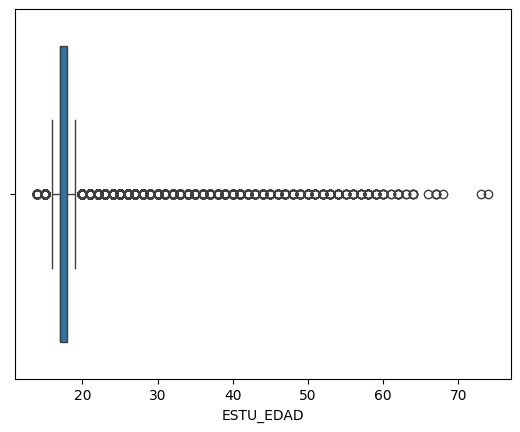

In [ ]:
sns.boxplot(data= icfes4, x= 'ESTU_EDAD')